# Predicting Heart Disease using Machine Learning

This notebook looks into various Python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We are going to take the following approach-

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition-

In a statement
> Given clinical parameters about a patient, can we predict whether or not they have heart disease

## 2. Data-

The original data came from Cleveland data from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle-
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation-

> If we can reach 95% accuracy at predicting whether or not person has heart disease during proof of concept, we will persue the project.

## 4. Features-

Information about each of the features of the data

**Create data dictionary**

* age
* sex
    * 1 --> Male
    * 0 --> Female
* cp - chest pain type (4 values)
    * Value 0: typical angina - discomfort that is noted when the heart does not get enough blood or oxygen.
    * Value 1: atypical angina - chest pain not related to the heart
    * Value 2: non-anginal pain -  typically esophageal spasms (not heart related)
    * Value 3: asymptomatic - chest pain not showing signs of disease
* trestbps - resting blood pressure(in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - fasting blood sugar > 120 mg/dl (1--> True, 0--> False)
* restecg - resting electrocardiographic results (values 0,1,2)
     * Value 0: normal
     * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina
    * 1 --> yes
    * 0 --> no
* oldpeak - ST depression induced by exercise relative to rest
* slope- the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
* ca- number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

* target (Have disease or not) Yes=1 or No=0




## Preparing the tools

We are going to use pandas, numpy and matplotlib for data analysis

In [1]:
# import the required tools

# Regular EDA and plotting libaraies
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

from matplotlib.patches import Patch;

 # We want our plots to appear inside notebook
%matplotlib inline     

# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# catboost classifier model
from catboost import CatBoostClassifier

# xgboost classifier model
from xgboost import XGBClassifier

# Model evaluation

from sklearn.model_selection import train_test_split,cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve




## Load Data

In [2]:
heart_disease_data=pd.read_csv('heart-disease.csv');
heart_disease_data.shape # rows, columns

(303, 14)

## Exploratory Data Analysis

The goal here is to find out more about the data (become subject matter expert on the data)

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different data-types?
3. What's missing from the data and how do you deal with missing data?
4. Where are outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Let's find out how many of each class any there
heart_disease_data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

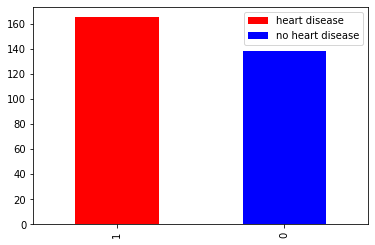

In [7]:
heart_disease_data.target.value_counts().plot(kind='bar' , color=['red','blue'], tick_label =['heart disease','no heart disease'])
plt.legend([Patch(facecolor='red'),Patch(facecolor='blue')],['heart disease','no heart disease']);

In [8]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency according to sex

In [9]:
pd.crosstab(heart_disease_data.target,heart_disease_data.sex)

sex,0,1
target,,
0,24,114
1,72,93


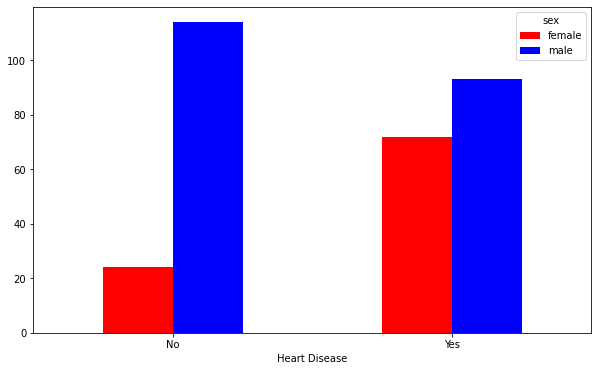

In [10]:
pd.crosstab(heart_disease_data.target,heart_disease_data.sex).rename(index={1:'Yes',0:'No'},columns={1:'male',0:'female'}).plot(kind='bar',figsize=(10,6),color=['red','blue'], xlabel='Heart Disease')
plt.xticks(rotation=0);

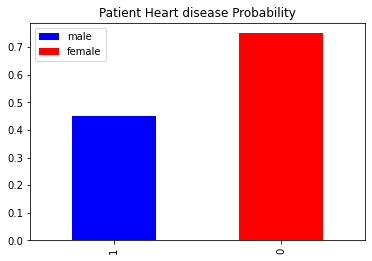

In [11]:
(heart_disease_data[heart_disease_data['target']==1].sex.value_counts()/heart_disease_data.sex.value_counts()).plot(kind='bar',color=['blue','red'], title='Patient Heart disease Probability').legend([Patch(facecolor='blue'),Patch(facecolor='red')],['male','female']);

## Age vs max heart rate for heart disease

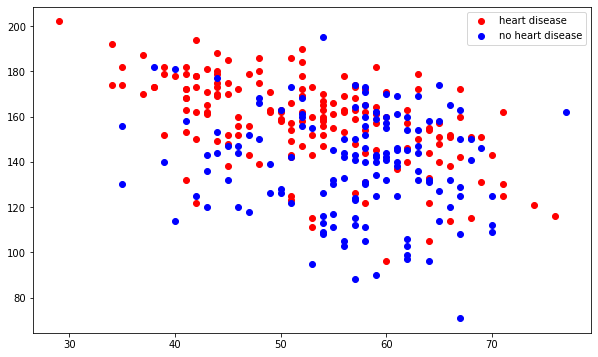

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

# scatter with positive examples
ax.scatter(heart_disease_data.age[heart_disease_data.target==1],heart_disease_data.thalach[heart_disease_data.target==1], c='red')


# scatter with negative examples
ax.scatter(heart_disease_data.age[heart_disease_data.target==0],heart_disease_data.thalach[heart_disease_data.target==0],c='blue')
ax.legend(['heart disease','no heart disease'])

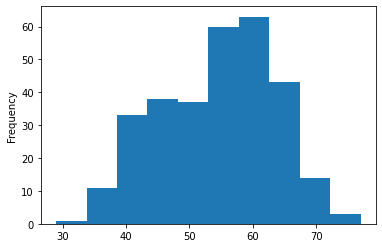

In [13]:
# Check age distribution with histogram

heart_disease_data.age.plot.hist();

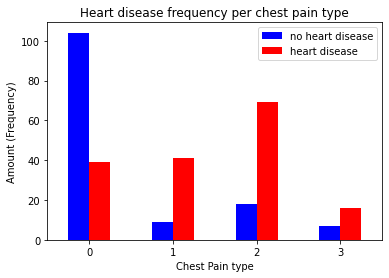

In [14]:
# heart disease frequency per chest pain type
'''
cp - chest pain type (4 values)

Value 0: typical angina - discomfort that is noted when the heart does not get enough blood or oxygen.
Value 1: atypical angina - chest pain not related to the heart
Value 2: non-anginal pain - typically esophageal spasms (not heart related)
Value 3: asymptomatic - chest pain not showing signs of disease
'''

pd.crosstab(heart_disease_data.cp,heart_disease_data.target).plot.bar(color=['blue','red']);
plt.title('Heart disease frequency per chest pain type')
plt.xlabel('Chest Pain type')
plt.ylabel('Amount (Frequency)')
plt.legend(['no heart disease','heart disease']);
plt.xticks(rotation=0);

In [15]:
heart_disease_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


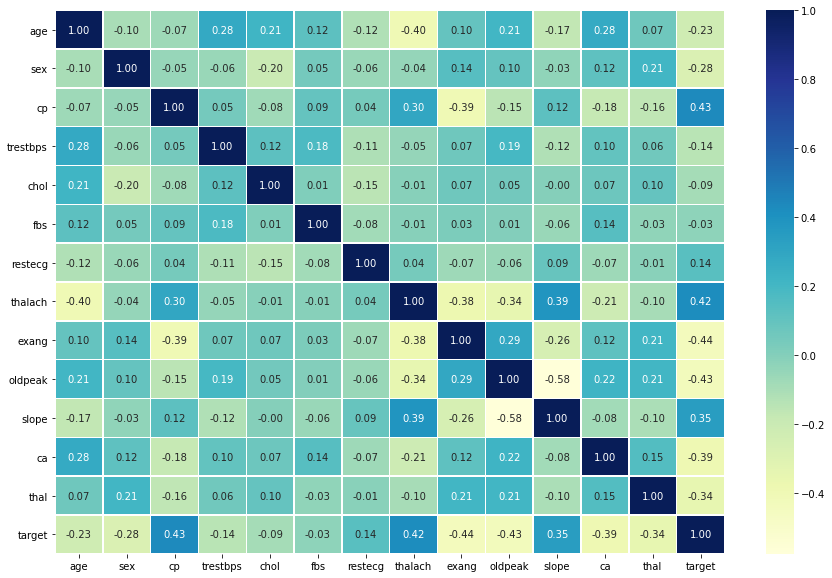

In [16]:
corr_matrix=heart_disease_data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix , annot=True, linewidths=0.5,fmt='.2f',cmap='YlGnBu')

<AxesSubplot:xlabel='target', ylabel='exang'>

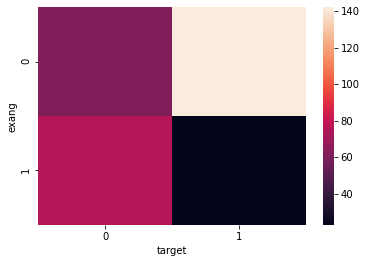

In [17]:
# exang vs target (should have negative correlation based on corr matrix)

sns.heatmap(pd.crosstab(heart_disease_data.exang,heart_disease_data.target))

## 5. Modelling

In [18]:
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Split data into X and y

X = heart_disease_data.drop('target',axis=1);
y = heart_disease_data['target'];

# split data into train and test sets

np.random.seed(42);
X_train, X_test, y_train, y_test =train_test_split(X,
                                                  y,
                                                  test_size=0.2)

Now we have training and test sets, it is time to build a machine learning model ....

We will train the model on training set

And test its performance on the test set

    
We are going to try 3 different machine learning models-
   1. Logistic Regression - Despite its name is a linear model for classification rather than regression
   2. K-nearest neighbours Classifier
   3. Random Forest Classifier

In [20]:
# let us put the models we try in a dictionary

models={'Logistic_Regression':LogisticRegression(),
        'KNN': KNeighborsClassifier(),
        'Random_Forest':RandomForestClassifier()}

# function to fit and score models

def fit_and_score_models(models, X_train, X_test, y_train,y_test):
    '''
    Fits and evaluates given machine learning models
    models - A dict of different scikit-learn models
    X_train - Training Features(No labels)
    X_test - Testing Features(No labels)
    y_train - Training labels
    y_test - Testing labels
    '''
    np.random.seed(42)
    
    model_scores={};
    
    for name, model in models.items():
        # fit model in the data
        model.fit(X_train,y_train);
        # calculate scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

model_scores=fit_and_score_models(models,X_train,X_test,y_train,y_test)

C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

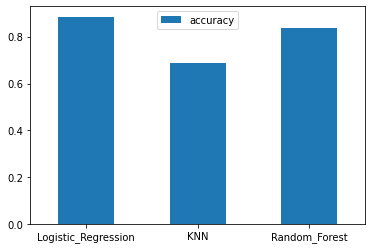

In [21]:
# Model comparison

model_compare=pd.DataFrame(model_scores , index=['accuracy'])
model_compare.T.plot.bar(rot=0)

Now we have got a baseline model.. and we know first predictions are not always what we should base our next steps on .. What should we do??

Let's look at the following

  * Hyperparmeter Tuning
  * Feature Importance
  * Confusion Matrix
  * Cross Validation
  * accuracy
  * precision
  * recall
  * f1 score
  * classification report
  * ROC curve (Area under the curve)
    

### Hyperparameter tuning (by hand)

Max score on test data = 0.7540983606557377 for 11 neighbors 


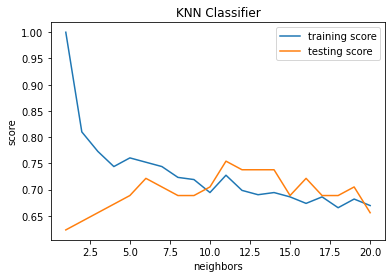

In [22]:
# Let's tune KNN
train_scores=[]
test_scores=[]

# create list of different n_neighbour values
neighbors=range(1,21);

knn=KNeighborsClassifier()

# Loop through different neighbours

for i in neighbors:
    
    # tune hyperparameter
    knn.set_params(n_neighbors=i)
    # fit training data
    knn.fit(X_train,y_train);
    # 
    train_scores.append(knn.score(X_train,y_train));
    test_scores.append(knn.score(X_test,y_test));
    
fig,ax=plt.subplots();
ax.plot(neighbors,train_scores, label='training score')
ax.plot(neighbors,test_scores, label='testing score')
plt.xlabel('neighbors')
plt.ylabel('score')
plt.title('KNN Classifier')
plt.legend();
print(f"Max score on test data = {max(test_scores)} for {test_scores.index(max(test_scores))+1} neighbors ")

## HyperParameter tuning with RandomizedSearchCV

In [23]:
np.random.seed(42)

# Create Hyperparameters for logistic regression
LR_grid={'C':np.logspace(-4,4,20),
                'solver':['liblinear']};

# Create Hyperparameters for random forest
RF_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(2,20,2)
        }

Now that we have got hyperparameters for our models let's tune them using RandomizedSearchCV()

In [24]:
# Tune Logistic Regressiona

np.random.seed(42);

# setup random Hyperparameter for logistic regression
RS_LR=RandomizedSearchCV(LogisticRegression(),LR_grid,cv=5,n_iter=20,verbose=2)

# fitting random Hyperparameter search model
RS_LR.fit(X_train,y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

In [25]:
RS_LR.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [26]:
RS_LR.score(X_test,y_test)

0.8852459016393442

Now we have tuned Logistic regression, let us do the same for RandomForestClassifier()

In [27]:
RS_RF=RandomizedSearchCV(RandomForestClassifier(),RF_grid,cv=5,n_iter=20, verbose=2)

# fitting for RF Classifier
RS_RF.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=760; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=760; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=760; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=760; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=760; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END ma

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=360; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=360; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=360; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=360; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=360; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=660; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=660; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=660; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=660; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=660; total tim

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [28]:
# Find best hyperparameters
RS_RF.best_params_

{'n_estimators': 760,
 'min_samples_split': 10,
 'min_samples_leaf': 12,
 'max_depth': None}

In [29]:
RS_RF.score(X_test,y_test)

0.8688524590163934

## Hyperparameter tuning using GridSearchCV

    Since our LogisticRegression model provides best scores so far, try GridSearchCV

In [30]:
# try different hyperparameters for LogisticRegression
log_reg_grid={'C':np.logspace(-1,1,30),
              'solver':['liblinear']}

# setup grid parameters

GS_LR=GridSearchCV(LogisticRegression(),log_reg_grid,cv=5,verbose=True,n_jobs=-1)

# fit our GridParameterSearch model

GS_LR.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [31]:
GS_LR.best_params_

{'C': 0.2212216291070449, 'solver': 'liblinear'}

In [32]:
GS_LR.score(X_test,y_test)

0.8852459016393442

## Evaluate our machine learning classifier beyond accuracy

* ROC curve and AUC Score
* Confusion Matrix
* Classification report
* Precision
* recall
* F1 score

It would be great if cross-validation is used if possible

To make comparison and evaluation of model, first we need predictions

In [33]:
# Make predictions with tuned model
y_preds=GS_LR.predict(X_test)

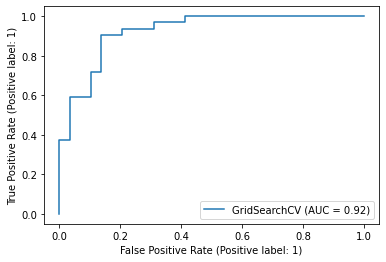

In [34]:
plot_roc_curve(GS_LR,X_test,y_test);

In [35]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


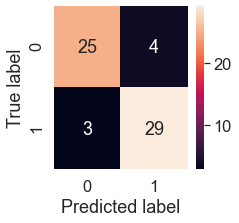

In [36]:
sns.set(font_scale=1.5)
def plot_conf_matrix(y_test,y_preds):
    """
    Plots a Confusion Matrix using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3));
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

plot_conf_matrix(y_test,y_preds)

In [37]:
# classification Report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## calculate evaluation metrics using cross-validation 

calculate precision, recall, f1 score for cross-validation using `cross_val_score()`

In [38]:
# Check best hyperparameters

GS_LR.best_params_

{'C': 0.2212216291070449, 'solver': 'liblinear'}

In [39]:
# Create new classifier using best parameter-

classifier_model = LogisticRegression(C=GS_LR.best_params_['C'],solver=GS_LR.best_params_['solver']);


In [40]:
# Cross validated accuracy

cv_acc=cross_val_score(classifier_model,X,y,cv=5)
print(cv_acc)
print(f'Average Cross-validated Accuracy = {np.mean(cv_acc)}')

[0.81967213 0.90163934 0.8852459  0.88333333 0.75      ]
Average Cross-validated Accuracy = 0.8479781420765027


In [41]:
# Cross validated precision

cv_precision=cross_val_score(classifier_model,X,y,cv=5, scoring='precision')
print(cv_precision)
print(f'Average Cross-validated Precision = {np.mean(cv_precision)}')

[0.775      0.88571429 0.86111111 0.86111111 0.725     ]
Average Cross-validated Precision = 0.8215873015873015


In [42]:
# Cross validated recall

cv_recall=cross_val_score(classifier_model,X,y,cv=5, scoring='recall')
print(cv_recall)
print(f'Average Cross-validated Recall = {np.mean(cv_recall)}')

[0.93939394 0.93939394 0.93939394 0.93939394 0.87878788]
Average Cross-validated Recall = 0.9272727272727274


In [43]:
# Cross validated f1 score

cv_f1=cross_val_score(classifier_model,X,y,cv=5, scoring='f1')
print(cv_f1)
print(f'Average Cross-validated f1 score = {np.mean(cv_f1)}')

[0.84931507 0.91176471 0.89855072 0.89855072 0.79452055]
Average Cross-validated f1 score = 0.8705403543192143


In [44]:
# Visualize our cross validated metrics

cv_metrics = pd.DataFrame({'accuracy':list(cv_acc)+[np.mean(cv_acc)],'precision':list(cv_precision)+[np.mean(cv_precision)],
                           'recall':list(cv_recall)+[np.mean(cv_recall)],'f1_score':list(cv_f1)+[np.mean(cv_f1)]},
                          index=['CV1_score','CV2_score','CV3_score','CV4_score','CV5_score','score'])
cv_metrics

,accuracy,precision,recall,f1_score
CV1_score,0.819672,0.775000,0.939394,0.849315
CV2_score,0.901639,0.885714,0.939394,0.911765
CV3_score,0.885246,0.861111,0.939394,0.898551
CV4_score,0.883333,0.861111,0.939394,0.898551
CV5_score,0.750000,0.725000,0.878788,0.794521
score,0.847978,0.821587,0.927273,0.870540


Text(0.5, 1.0, 'Logistic Regression performance')

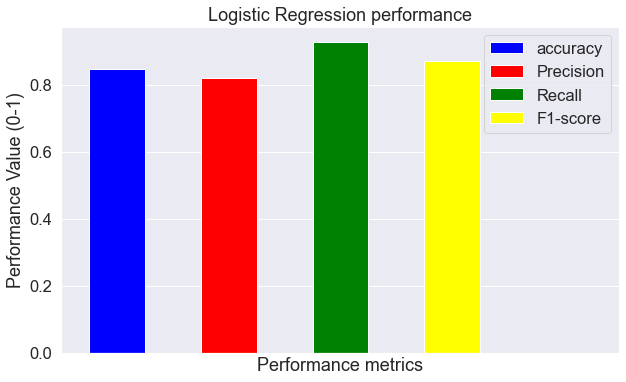

In [45]:
cv_metrics.loc['score'].plot(kind='bar',color=['blue','red','green','yellow'],figsize=(10,6));
plt.legend([Patch(facecolor='blue'),
            Patch(facecolor='red'),
            Patch(facecolor='green'),
            Patch(facecolor='yellow')],['accuracy','Precision','Recall','F1-score'])
plt.xticks([])
left,right = plt.xlim();
plt.xlim(left,right+1)
plt.xlabel('Performance metrics')
plt.ylabel('Performance Value (0-1)')
plt.title('Logistic Regression performance')



## Feature Importance

Which features contributed most to the outcomes of the model and how did they contribute?

Finding feature Importance is different for each ML model

Let us find feature importance for our Logistic Regression Model

In [46]:
list(corr_matrix.loc['target'].drop('target'))

[-0.22543871587483838,
 -0.28093657550176676,
 0.43379826150689443,
 -0.14493112849775,
 -0.08523910513756904,
 -0.028045760272712952,
 0.1372295028737732,
 0.4217409338106742,
 -0.43675708335330315,
 -0.4306960016873686,
 0.34587707824172464,
 -0.39172399235125244,
 -0.34402926803830997]

In [47]:
lr=LogisticRegression(C=classifier_model.get_params()['C'],solver=classifier_model.get_params()['solver'])
lr.fit(X_train,y_train)
lr.coef_[0]

array([ 0.00349245, -0.88796929,  0.66918365, -0.01158797, -0.00169042,
        0.04686426,  0.32467003,  0.02468531, -0.62089941, -0.57279052,
        0.46279214, -0.64494489, -0.68916126])

In [48]:
feat_imp_LR=dict();

iter=0;
for x in X.columns:
    feat_imp_LR[x]=[lr.coef_[0][iter]];
    iter+=1;

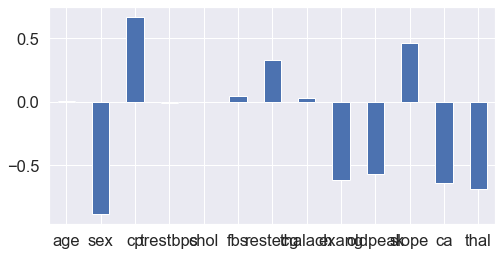

In [49]:
pd.DataFrame(feat_imp_LR,index=['feature_importance']).T.plot.bar(figsize=(8,4), legend=False);
plt.xticks(rotation=0);

## 6. Experimentation

If you haven't hit your evaluation metric yet.. ask yourself..

* Could you collect more data?
* Could you try a better model? (Like CatBoost, XGBoost)
* Could you improve the current model? (Beyond what you have done so far)
* If your model is good enough, how would you export it and share with others?

In [50]:
# Let us try CatBoost

cb_clf=CatBoostClassifier()
cb_clf.fit(X_train,y_train)
cb_clf.score(X,y)

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 189ms	remaining: 3m 8s
1:	learn: 0.6846992	total: 190ms	remaining: 1m 35s
2:	learn: 0.6804482	total: 192ms	remaining: 1m 3s
3:	learn: 0.6762280	total: 193ms	remaining: 48.1s
4:	learn: 0.6716854	total: 195ms	remaining: 38.7s
5:	learn: 0.6672902	total: 196ms	remaining: 32.5s
6:	learn: 0.6640072	total: 197ms	remaining: 28s
7:	learn: 0.6602127	total: 199ms	remaining: 24.6s
8:	learn: 0.6563948	total: 200ms	remaining: 22s
9:	learn: 0.6525316	total: 201ms	remaining: 19.9s
10:	learn: 0.6483925	total: 203ms	remaining: 18.2s
11:	learn: 0.6449119	total: 204ms	remaining: 16.8s
12:	learn: 0.6413090	total: 205ms	remaining: 15.6s
13:	learn: 0.6374641	total: 206ms	remaining: 14.5s
14:	learn: 0.6335822	total: 208ms	remaining: 13.7s
15:	learn: 0.6288496	total: 210ms	remaining: 12.9s
16:	learn: 0.6250951	total: 211ms	remaining: 12.2s
17:	learn: 0.6209988	total: 213ms	remaining: 11.6s
18:	learn: 0.6182407	total: 214ms	remaining: 11.1s
19:	learn: 0.6

261:	learn: 0.2825288	total: 528ms	remaining: 1.49s
262:	learn: 0.2819432	total: 530ms	remaining: 1.48s
263:	learn: 0.2813131	total: 531ms	remaining: 1.48s
264:	learn: 0.2806125	total: 532ms	remaining: 1.48s
265:	learn: 0.2800353	total: 534ms	remaining: 1.47s
266:	learn: 0.2792874	total: 535ms	remaining: 1.47s
267:	learn: 0.2787927	total: 536ms	remaining: 1.46s
268:	learn: 0.2780463	total: 537ms	remaining: 1.46s
269:	learn: 0.2773433	total: 539ms	remaining: 1.46s
270:	learn: 0.2768860	total: 540ms	remaining: 1.45s
271:	learn: 0.2765006	total: 542ms	remaining: 1.45s
272:	learn: 0.2760610	total: 543ms	remaining: 1.45s
273:	learn: 0.2757626	total: 545ms	remaining: 1.44s
274:	learn: 0.2754302	total: 546ms	remaining: 1.44s
275:	learn: 0.2748640	total: 548ms	remaining: 1.44s
276:	learn: 0.2746047	total: 549ms	remaining: 1.43s
277:	learn: 0.2739447	total: 550ms	remaining: 1.43s
278:	learn: 0.2734597	total: 552ms	remaining: 1.43s
279:	learn: 0.2728541	total: 553ms	remaining: 1.42s
280:	learn: 

519:	learn: 0.1889160	total: 857ms	remaining: 791ms
520:	learn: 0.1886876	total: 859ms	remaining: 790ms
521:	learn: 0.1883086	total: 860ms	remaining: 788ms
522:	learn: 0.1879372	total: 861ms	remaining: 786ms
523:	learn: 0.1877249	total: 863ms	remaining: 784ms
524:	learn: 0.1873883	total: 864ms	remaining: 781ms
525:	learn: 0.1872379	total: 865ms	remaining: 779ms
526:	learn: 0.1869702	total: 866ms	remaining: 778ms
527:	learn: 0.1867470	total: 868ms	remaining: 776ms
528:	learn: 0.1865101	total: 869ms	remaining: 774ms
529:	learn: 0.1862188	total: 870ms	remaining: 772ms
530:	learn: 0.1859320	total: 872ms	remaining: 770ms
531:	learn: 0.1855756	total: 873ms	remaining: 768ms
532:	learn: 0.1854109	total: 874ms	remaining: 766ms
533:	learn: 0.1849044	total: 875ms	remaining: 764ms
534:	learn: 0.1847475	total: 877ms	remaining: 762ms
535:	learn: 0.1845546	total: 878ms	remaining: 760ms
536:	learn: 0.1842422	total: 879ms	remaining: 758ms
537:	learn: 0.1841026	total: 880ms	remaining: 756ms
538:	learn: 

799:	learn: 0.1329078	total: 1.21s	remaining: 302ms
800:	learn: 0.1327460	total: 1.21s	remaining: 301ms
801:	learn: 0.1326160	total: 1.21s	remaining: 299ms
802:	learn: 0.1324963	total: 1.21s	remaining: 298ms
803:	learn: 0.1322169	total: 1.21s	remaining: 296ms
804:	learn: 0.1320703	total: 1.22s	remaining: 295ms
805:	learn: 0.1319126	total: 1.22s	remaining: 293ms
806:	learn: 0.1316860	total: 1.22s	remaining: 291ms
807:	learn: 0.1315914	total: 1.22s	remaining: 290ms
808:	learn: 0.1314595	total: 1.22s	remaining: 288ms
809:	learn: 0.1313921	total: 1.22s	remaining: 287ms
810:	learn: 0.1312429	total: 1.22s	remaining: 285ms
811:	learn: 0.1310889	total: 1.23s	remaining: 284ms
812:	learn: 0.1308891	total: 1.23s	remaining: 282ms
813:	learn: 0.1308240	total: 1.23s	remaining: 281ms
814:	learn: 0.1306140	total: 1.23s	remaining: 279ms
815:	learn: 0.1304747	total: 1.23s	remaining: 277ms
816:	learn: 0.1303288	total: 1.23s	remaining: 276ms
817:	learn: 0.1302676	total: 1.23s	remaining: 274ms
818:	learn: 

0.9636963696369637

In [51]:
cb_clf.score(X_test,y_test)

0.8360655737704918

In [52]:
cb_clf.score(X_train,y_train)

0.9958677685950413

In [53]:
cb_clf.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.005621000193059444,
 'score_function': 'Cosine',
 'task_type': 'CPU',

In [54]:
cb_grid={'depth':[4,5,6,7,8],
         'learning_rate':[0.005621000193059444,0.2,0.3],
         'iterations':[10,50, 100,500,1000]}

cb_model_1=GridSearchCV(CatBoostClassifier(),cb_grid,cv=5, verbose=2,n_jobs=-1);
cb_model_1.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
0:	learn: 0.6915368	total: 868us	remaining: 42.6ms
1:	learn: 0.6899479	total: 1.75ms	remaining: 42ms
2:	learn: 0.6883655	total: 2.52ms	remaining: 39.5ms
3:	learn: 0.6865733	total: 3.37ms	remaining: 38.7ms
4:	learn: 0.6848981	total: 4.15ms	remaining: 37.4ms
5:	learn: 0.6830933	total: 4.91ms	remaining: 36ms
6:	learn: 0.6814338	total: 5.72ms	remaining: 35.2ms
7:	learn: 0.6799473	total: 6.51ms	remaining: 34.2ms
8:	learn: 0.6786026	total: 7.27ms	remaining: 33.1ms
9:	learn: 0.6767041	total: 8.01ms	remaining: 32ms
10:	learn: 0.6752123	total: 8.74ms	remaining: 31ms
11:	learn: 0.6738172	total: 9.49ms	remaining: 30.1ms
12:	learn: 0.6722753	total: 10.2ms	remaining: 29.1ms
13:	learn: 0.6704502	total: 11ms	remaining: 28.2ms
14:	learn: 0.6685733	total: 11.7ms	remaining: 27.2ms
15:	learn: 0.6673505	total: 12.4ms	remaining: 26.5ms
16:	learn: 0.6660638	total: 13.2ms	remaining: 25.6ms
17:	learn: 0.6646602	total: 13.9ms	remaining: 24.7ms
18:	l

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002C1FEC41E50>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8],
                         'iterations': [10, 50, 100, 500, 1000],
                         'learning_rate': [0.005621000193059444, 0.2, 0.3]},
             verbose=2)

In [55]:
cb_model_1.best_params_

{'depth': 4, 'iterations': 50, 'learning_rate': 0.005621000193059444}

In [56]:
cb_model_1.score(X_test,y_test)

0.8688524590163934

In [57]:
cb_model_1.score(X_train,y_train)

0.8760330578512396

In [58]:
y_preds1=cb_clf.predict(X_test)
print(classification_report(y_test,y_preds1))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [59]:
y_preds2=cb_model_1.predict(X_test)
print(classification_report(y_test,y_preds2))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [60]:
# XGBoost
xgb_clf=XGBClassifier(use_label_encoder=False);
xgb_clf.fit(X_train,y_train);
xgb_clf.score(X_test,y_test)

[00:31:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.819672131147541

In [61]:
grid_xgb={'n_estimators':[10,20,50,100,200,500,1000],
          'learning_rate':[0.01,0.05,0.1,0.2,0.3,0.4,0.5]}
GS_xgb=GridSearchCV(XGBClassifier(use_label_encoder=False),grid_xgb,cv=5)
GS_xgb.fit(X_train,y_train)

[00:31:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[00:31:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[00:31:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[00:31:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[00:31:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[00:31:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[00:31:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[00:31:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [62]:
GS_xgb.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [63]:
GS_xgb.score(X_test,y_test)

0.819672131147541

In [64]:
xgb_estimator=XGBClassifier(n_estimators=100,learning_rate=0.2,use_label_encoder=False);
xgb_accuracy = np.mean(cross_val_score(xgb_estimator,X,y,cv=5,scoring='accuracy'));
xgb_precision = np.mean(cross_val_score(xgb_estimator,X,y,cv=5,scoring='precision'));
xgb_recall = np.mean(cross_val_score(xgb_estimator,X,y,cv=5,scoring='recall'));
xgb_f1 = np.mean(cross_val_score(xgb_estimator,X,y,cv=5,scoring='f1'));

xgb_metrics={'accuracy':[xgb_accuracy],
             'precision':[xgb_precision],
             'recall':[xgb_recall],
             'f1':[xgb_f1]};
xgb_df=pd.DataFrame(xgb_metrics, index=['XGB Classifier Performance']);



[00:31:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

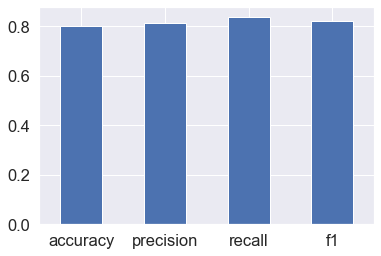

In [65]:
xgb_df.T.plot.bar(legend=False)
plt.xticks(rotation=0);

### Till now we are not able to achieve accuracy greater than 90% with any of the models

In fact even when CatBoostClassifier() overfits the training data (99.58% accuracy on training data), <br>
it performs low on testing data(83.6% accuracy on testing data)

In [66]:
cb_clf.score(X_train,y_train)

0.9958677685950413

In [67]:
cb_clf.score(X_test,y_test)

0.8360655737704918



### Summary till now-

* Till now LogisticRegression() is giving best score/result. 
* Even CatBoostClassifier() and XGBClassifier() have been unable to outperform.
* Let's try collecting more data for training/testing

### I have taken more samples of heart disease data from <br> https://www.kaggle.com/redwankarimsony/heart-disease-data <br>

In [68]:
heart_disease_more_data = pd.read_csv('heart_disease_more_data.csv');
heart_disease_more_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [69]:
heart_disease_more_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### Records with `chol = 0` and `chol = nan` seem to be not filled. Let us fill them with median value

In [70]:
median_chol=np.median(heart_disease_more_data.chol[(heart_disease_more_data.chol.isna()==False) & (heart_disease_more_data.chol !=0) ])
median_chol

239.5

In [71]:
heart_disease_more_data.chol.replace(0,median_chol,inplace=True)
heart_disease_more_data.chol.fillna(median_chol,inplace=True)

In [72]:
(heart_disease_more_data[heart_disease_more_data.chol!=0]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.2+ KB


## We need to clean this data

### Firstly we need to undestand the data

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
    <br>-- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute <br> --(target [0=no heart disease; 1,2,3,4 = stages of heart disease ] )

In [73]:
# We can remove the Unique id of each patient as that may not impact the outcome of whether or not a patient has heart disease
heart_disease_more_data.drop('id',axis=1,inplace=True);
heart_disease_more_data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Now we convert Categorical data into numerical format

In [74]:
heart_disease_more_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


#### sex, dataset, cp, fbs,restecg,exang,slope,thal are non numerical data 

In [75]:
heart_disease_more_data.sex.value_counts()

Male      726
Female    194
Name: sex, dtype: int64

#### `sex` column has 2 categories male and female

In [76]:
sex_dict={'Female':0,'Male':1};
heart_disease_more_data.sex=heart_disease_more_data.sex.apply(lambda x:sex_dict[x]);

#### Now `sex` data is numerical. 

For Males (`sex`=1)<br>
For Females (`sex`=0) 

In [77]:
heart_disease_more_data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,1,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,1,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,1,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,0,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [78]:
heart_disease_more_data.sex.value_counts()

1    726
0    194
Name: sex, dtype: int64

In [79]:
heart_disease_more_data.dataset.value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

#### `dataset` column mentions the location of patient. It has 4 categories
* Cleveland 
* Hungary
* VA Long Beach
* Switzerland

In [80]:
loc_dict={'Cleveland':0,'Hungary':1,'VA Long Beach':2,'Switzerland':3};
heart_disease_more_data['location']=heart_disease_more_data.dataset.apply(lambda x:loc_dict[x]);
heart_disease_more_data.drop('dataset',axis=1,inplace=True);

In [81]:
heart_disease_more_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,location
0,63,1,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,67,1,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,0
2,67,1,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,0
3,37,1,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,41,0,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


In [82]:
heart_disease_more_data.location.value_counts()

0    304
1    293
2    200
3    123
Name: location, dtype: int64

#### We have stored numerical categorical values corresponding to `dataset` column in a new column `location` and deleted the old `dataset` column

#### Now data in `location` column contains-
* 0 ==> Cleveland 
* 1 ==> Hungary
* 2 ==> VA Long Beach
* 3 ==> Switzerland

In [83]:
heart_disease_more_data.cp.value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

`cp` - chest pain type 
* typical angina
* atypical angina
* non-anginal pain
* asymptomatic

In [84]:
cp_dict={'typical angina':3,'atypical angina':0,'non-anginal':1,'asymptomatic':2};
heart_disease_more_data.cp=heart_disease_more_data.cp.apply(lambda x:cp_dict[x]);

`cp` - chest pain type (4 values)

* Value 3: typical angina - discomfort that is noted when the heart does not get enough blood or oxygen.
* Value 0: atypical angina - chest pain not related to the heart
* Value 1: non-anginal pain - typically esophageal spasms (not heart related)
* Value 2: asymptomatic - chest pain not showing signs of disease

In [85]:
heart_disease_more_data.cp.value_counts()

2    496
1    204
0    174
3     46
Name: cp, dtype: int64

In [86]:
heart_disease_more_data.fbs.value_counts()

False    692
True     138
Name: fbs, dtype: int64

In [87]:
heart_disease_more_data.fbs.isna().sum()

90

#### 'fbs' - fasting blood sugar > 120 mg/dl 
* False (692)
* True (138)
* missing values (90)

In [88]:
# Fill missing values with missing'
heart_disease_more_data.fbs.fillna('missing',inplace=True)

In [89]:
heart_disease_more_data.fbs.value_counts()

False      692
True       138
missing     90
Name: fbs, dtype: int64

In [90]:
fbs_dict={ False:-1 , True:1 , 'missing':0 };
heart_disease_more_data.fbs=heart_disease_more_data.fbs.apply(lambda x:fbs_dict[x]);


#### 'fbs' - fasting blood sugar > 120 mg/dl 
* -1 ==> False (692)
* 1 ==> True (138)
* 0 ==> missing values (90) [0.5 because we are not sure whether value is True or False]

In [91]:
heart_disease_more_data.fbs.value_counts()

-1    692
 1    138
 0     90
Name: fbs, dtype: int64

In [92]:
heart_disease_more_data.restecg.value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [93]:
heart_disease_more_data.restecg.isna().sum()

2

In [94]:
heart_disease_more_data.restecg.fillna('missing',inplace=True)

In [95]:
heart_disease_more_data.restecg.value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
missing               2
Name: restecg, dtype: int64

#### restecg - resting electrocardiographic results (values 0,1,2)

* normal : normal
* st-t abnormality : having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* lv hypertrophy : showing probable or definite left ventricular hypertrophy by Estes' criteria
* missing `restecg` value (2 such records) 

In [96]:
restecg_dict={'normal':1,'st-t abnormality':3,'lv hypertrophy':2,'missing':0};
heart_disease_more_data.restecg=heart_disease_more_data.restecg.apply(lambda x:restecg_dict[x]);

In [97]:
heart_disease_more_data.restecg.value_counts()

1    551
2    188
3    179
0      2
Name: restecg, dtype: int64

#### restecg - resting electrocardiographic results (values 0,1,2)

* Value 1: normal
* Value 3: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* Value 0 : missing `restecg` (2 such records)

In [98]:
heart_disease_more_data[heart_disease_more_data.oldpeak.isna()==True].isna().sum()

age          0
sex          0
cp           0
trestbps    55
chol         0
fbs          0
restecg      0
thalch      54
exang       54
oldpeak     62
slope       62
ca          62
thal        55
num          0
location     0
dtype: int64

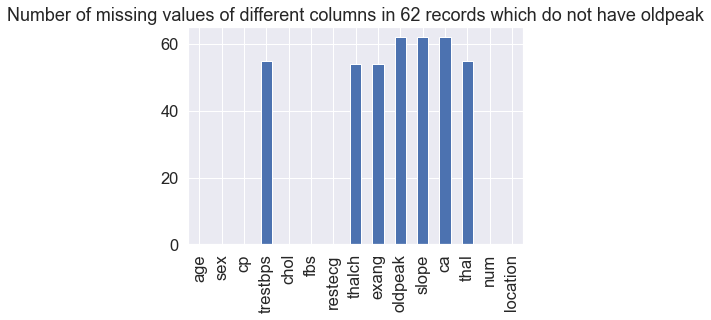

In [99]:
pd.DataFrame(heart_disease_more_data[heart_disease_more_data.oldpeak.isna()==True].isna().sum()).plot.bar(legend=False)
plt.title(f'Number of missing values of different columns in {len(heart_disease_more_data[heart_disease_more_data.oldpeak.isna()==True])} records which do not have oldpeak');

#### Out of the 62 records with missing `oldpeak` all of them have missing `slope` and `ca` values <br><br> and majority of the records have missing `trestbps` , `thalch`, `exang` , `thal` data

So, it is better to remove these 62 records since they portray very little information

In [100]:
heart_disease_more_data=heart_disease_more_data.dropna(axis=0,subset=['oldpeak']);
heart_disease_more_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       858 non-null    int64  
 1   sex       858 non-null    int64  
 2   cp        858 non-null    int64  
 3   trestbps  854 non-null    float64
 4   chol      858 non-null    float64
 5   fbs       858 non-null    int64  
 6   restecg   858 non-null    int64  
 7   thalch    857 non-null    float64
 8   exang     857 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      427 non-null    object 
 13  num       858 non-null    int64  
 14  location  858 non-null    int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 107.2+ KB


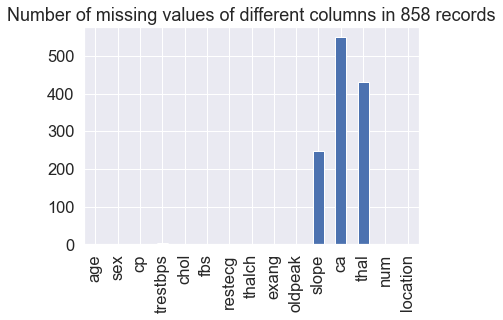

In [101]:
pd.DataFrame(heart_disease_more_data.isna().sum()).plot.bar(legend=False)
plt.title(f'Number of missing values of different columns in {len(heart_disease_more_data)} records');

#### 1 record with missing `thalch` column also has many missing values. Let's remove this record

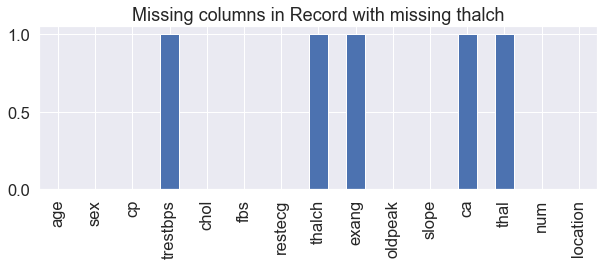

In [102]:
pd.DataFrame(heart_disease_more_data[heart_disease_more_data.thalch.isna()==True].isna().sum()).plot(kind='bar', figsize=(10,3),legend=False)
plt.title('Missing columns in Record with missing thalch');

In [103]:
heart_disease_more_data=heart_disease_more_data.dropna(axis=0,subset=['thalch']);
heart_disease_more_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       857 non-null    int64  
 1   sex       857 non-null    int64  
 2   cp        857 non-null    int64  
 3   trestbps  854 non-null    float64
 4   chol      857 non-null    float64
 5   fbs       857 non-null    int64  
 6   restecg   857 non-null    int64  
 7   thalch    857 non-null    float64
 8   exang     857 non-null    object 
 9   oldpeak   857 non-null    float64
 10  slope     610 non-null    object 
 11  ca        309 non-null    float64
 12  thal      427 non-null    object 
 13  num       857 non-null    int64  
 14  location  857 non-null    int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 107.1+ KB


#### `exang` , `slope` and `thal` still have non-numerical data

In [104]:
heart_disease_more_data.exang.value_counts()

False    524
True     333
Name: exang, dtype: int64

#### `exang`: exercise induced angina
   * True ==> yes
   * False ==> no

In [105]:
exang_dict={ False:0 , True:1};
heart_disease_more_data.exang=heart_disease_more_data.exang.apply(lambda x:exang_dict[x]);

In [106]:
heart_disease_more_data.exang.value_counts()

0    524
1    333
Name: exang, dtype: int64

#### `exang`: exercise induced angina
   * 1 ==> yes
   * 0 ==> no

In [107]:
heart_disease_more_data.slope.value_counts()

flat           345
upsloping      202
downsloping     63
Name: slope, dtype: int64

In [108]:
heart_disease_more_data.slope.isna().sum()

247

In [109]:
heart_disease_more_data.slope.fillna('missing',inplace=True);

In [110]:
heart_disease_more_data.slope.value_counts()

flat           345
missing        247
upsloping      202
downsloping     63
Name: slope, dtype: int64

slope- the slope of the peak exercise ST segment
   * upsloping (202 records)
   * flat (345 records)
   * downsloping (63 records)
   * missing (247 records)

In [111]:
slope_dict={'upsloping':2,'flat':-1,'downsloping':-2,'missing':1};
heart_disease_more_data.slope=heart_disease_more_data.slope.apply(lambda x:slope_dict[x]);

In [112]:
heart_disease_more_data.slope.value_counts()

-1    345
 1    247
 2    202
-2     63
Name: slope, dtype: int64

slope- the slope of the peak exercise ST segment
   * 2 ==> upsloping 
   * 1 ==> missing records
   * -1 ==> flat 
   * -2 ==> downsloping 


#### `thal` 
* normal
* fixed defect
* reversable defect
* missing

In [113]:
heart_disease_more_data.thal.value_counts()

normal               195
reversable defect    188
fixed defect          44
Name: thal, dtype: int64

In [114]:
heart_disease_more_data.thal.isna().sum()

430

In [115]:
heart_disease_more_data.thal.fillna('missing',inplace=True)

In [116]:
heart_disease_more_data.thal.value_counts()

missing              430
normal               195
reversable defect    188
fixed defect          44
Name: thal, dtype: int64

In [117]:
thal_dict={'normal':0, 'missing':1, 'fixed defect':2, 'reversable defect':3};
heart_disease_more_data.thal=heart_disease_more_data.thal.apply(lambda x:thal_dict[x]);

#### `thal` 
* 0 ==> normal
* 1 ==> missing
* 2 ==> fixed defect
* 3 ==> reversable defect



In [118]:
heart_disease_more_data.thal.value_counts()

1    430
0    195
3    188
2     44
Name: thal, dtype: int64

In [119]:
heart_disease_more_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       857 non-null    int64  
 1   sex       857 non-null    int64  
 2   cp        857 non-null    int64  
 3   trestbps  854 non-null    float64
 4   chol      857 non-null    float64
 5   fbs       857 non-null    int64  
 6   restecg   857 non-null    int64  
 7   thalch    857 non-null    float64
 8   exang     857 non-null    int64  
 9   oldpeak   857 non-null    float64
 10  slope     857 non-null    int64  
 11  ca        309 non-null    float64
 12  thal      857 non-null    int64  
 13  num       857 non-null    int64  
 14  location  857 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 107.1 KB


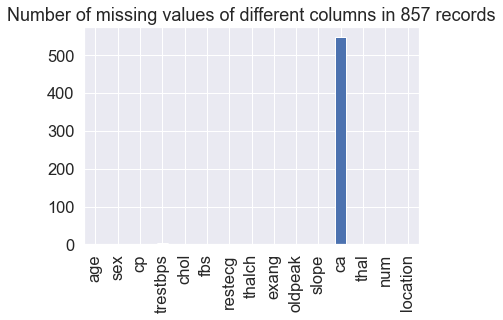

In [120]:
pd.DataFrame(heart_disease_more_data.isna().sum()).plot.bar(legend=False)
plt.title(f'Number of missing values of different columns in {len(heart_disease_more_data)} records');

#### Let's fix too many missin `ca` columns

In [121]:
heart_disease_more_data.ca.value_counts()

0.0    181
1.0     67
2.0     41
3.0     20
Name: ca, dtype: int64

In [122]:
ca_mean=np.mean(heart_disease_more_data.ca)
ca_mean

0.6763754045307443

In [123]:
# Let us fill missing values with mean ca value
heart_disease_more_data.ca.fillna(ca_mean,inplace=True)

In [124]:
heart_disease_more_data.ca.value_counts()

0.676375    548
0.000000    181
1.000000     67
2.000000     41
3.000000     20
Name: ca, dtype: int64

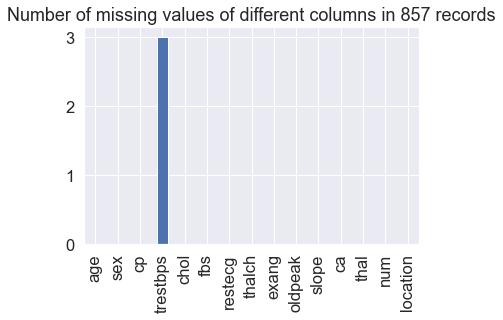

In [125]:
pd.DataFrame(heart_disease_more_data.isna().sum()).plot.bar(legend=False)
plt.title(f'Number of missing values of different columns in {len(heart_disease_more_data)} records');

#### now there are some missing values in `chol`  and `trestbps`

In [126]:
heart_disease_more_data.chol

0      233.0
1      286.0
2      229.0
3      250.0
4      204.0
       ...  
913    170.0
914    310.0
915    333.0
917    223.0
919    254.0
Name: chol, Length: 857, dtype: float64

Text(0.5, 1.0, 'Number of missing values of different columns in 857 records')

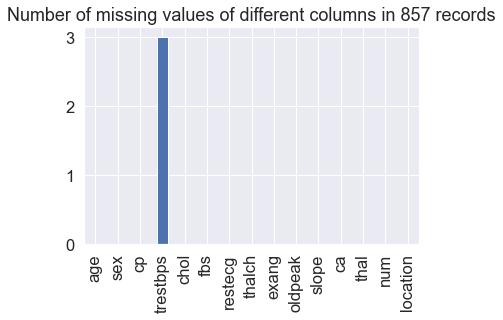

In [127]:
pd.DataFrame(heart_disease_more_data.isna().sum()).plot.bar(legend=False)
plt.title(f'Number of missing values of different columns in {len(heart_disease_more_data)} records')

#### Now only trestbps has 1 missing records

Let's fill 3 missing resting blood pressure values with that of healthy blood pressure of 120 mm Hg
<br>and replace 0 resting blood pressure with healthy blood pressure of 120 mm Hg (assuming 0 was entered by mistake)

In [128]:
heart_disease_more_data.trestbps.fillna(120,inplace=True)
heart_disease_more_data.trestbps.replace(0,120, inplace=True)

In [129]:
heart_disease_more_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       857 non-null    int64  
 1   sex       857 non-null    int64  
 2   cp        857 non-null    int64  
 3   trestbps  857 non-null    float64
 4   chol      857 non-null    float64
 5   fbs       857 non-null    int64  
 6   restecg   857 non-null    int64  
 7   thalch    857 non-null    float64
 8   exang     857 non-null    int64  
 9   oldpeak   857 non-null    float64
 10  slope     857 non-null    int64  
 11  ca        857 non-null    float64
 12  thal      857 non-null    int64  
 13  num       857 non-null    int64  
 14  location  857 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 107.1 KB


### Though the data is numerical now and no null value is present, we still need to clean the target (`num`)

In [130]:
heart_disease_more_data.num.value_counts()

0    389
1    250
2    101
3     91
4     26
Name: num, dtype: int64

#### When `num` =0 there is no heart disease ==> target should be 0 <br><br>When `num` = (1 or 2 or 3 or 4) there is heart disease ==> target should be 1

In [131]:
heart_disease_more_data['target']=(heart_disease_more_data.num>0);

In [132]:
heart_disease_more_data.target.value_counts()

True     468
False    389
Name: target, dtype: int64

In [133]:
heart_disease_more_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       857 non-null    int64  
 1   sex       857 non-null    int64  
 2   cp        857 non-null    int64  
 3   trestbps  857 non-null    float64
 4   chol      857 non-null    float64
 5   fbs       857 non-null    int64  
 6   restecg   857 non-null    int64  
 7   thalch    857 non-null    float64
 8   exang     857 non-null    int64  
 9   oldpeak   857 non-null    float64
 10  slope     857 non-null    int64  
 11  ca        857 non-null    float64
 12  thal      857 non-null    int64  
 13  num       857 non-null    int64  
 14  location  857 non-null    int64  
 15  target    857 non-null    bool   
dtypes: bool(1), float64(5), int64(10)
memory usage: 108.0 KB


In [134]:
heart_disease_more_data.drop(columns=['num'],inplace=True);

In [135]:
heart_disease_more_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       857 non-null    int64  
 1   sex       857 non-null    int64  
 2   cp        857 non-null    int64  
 3   trestbps  857 non-null    float64
 4   chol      857 non-null    float64
 5   fbs       857 non-null    int64  
 6   restecg   857 non-null    int64  
 7   thalch    857 non-null    float64
 8   exang     857 non-null    int64  
 9   oldpeak   857 non-null    float64
 10  slope     857 non-null    int64  
 11  ca        857 non-null    float64
 12  thal      857 non-null    int64  
 13  location  857 non-null    int64  
 14  target    857 non-null    bool   
dtypes: bool(1), float64(5), int64(9)
memory usage: 101.3 KB


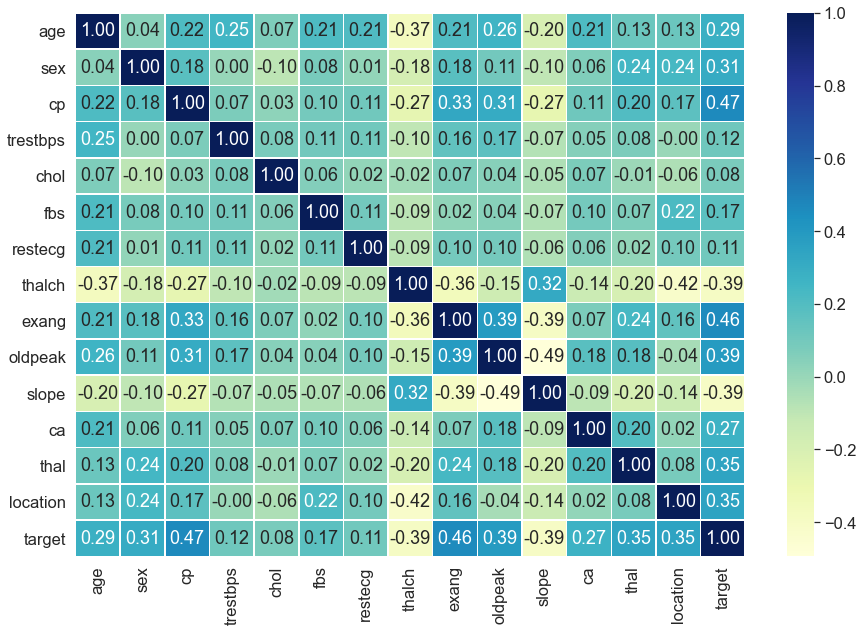

In [136]:
corr_matrix=heart_disease_more_data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix , annot=True, linewidths=0.5,fmt='.2f',cmap='YlGnBu')

In [137]:

def cv_score_calc(estimator,X,y):
    '''
    Calculates cross validation score for 5 cross validation splits
    
    Input arguments-
    estimator ==> the model used for cross validation (training and testing)
    X ==> features to cross-validate
    y ==> targets
    
    Return Value-
    A dict of metric (accuracy/precision/recall/f1) as the key 
    and corresponding score as the value
    '''
    np.random.seed(42)
    metrics=['accuracy','precision','recall','f1'];
    scoring=dict();
    for key in metrics:
        scoring[key]=np.mean(cross_val_score(estimator,X,y,cv=5,scoring=key,n_jobs=-1));
    return scoring;

In [138]:
X = heart_disease_more_data.drop(['target','age','location','trestbps'],axis=1);
y = heart_disease_more_data.target;

In [139]:
X.shape,y.shape

((857, 11), (857,))

### Let's check performance for different classfiers

* KNN Classifier
* Random Forest
* Logistic Regression (Classifier)
* XGBClassifier

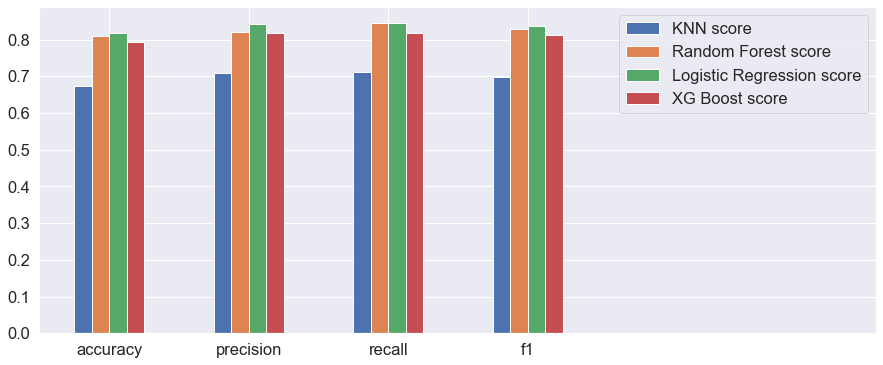

In [140]:
pd.DataFrame({'KNN score':cv_score_calc(KNeighborsClassifier(), X, y),
              'Random Forest score':cv_score_calc(RandomForestClassifier(), X, y),
              'Logistic Regression score':cv_score_calc(LogisticRegression(), X, y),
              'XG Boost score':cv_score_calc(XGBClassifier(), X, y)}).plot(kind='bar', figsize=(15,6));
plt.xticks(rotation=0)
l,r=plt.xlim();
plt.xlim(l,r+2);

In [141]:
# Logistic Regression Hyperparameter tuning
np.random.seed(42);

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.15)

tuning_grid =  {'C':np.logspace(-1,1,20),
                'penalty':['l1','l2'],
                'solver':['liblinear','lbfgs']};

GS_CV_LR=GridSearchCV(LogisticRegression(max_iter=700),tuning_grid,cv=5,verbose=2,n_jobs=-1);
GS_CV_LR.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.81463392        nan 0.82701937 0.82012282 0.8187624         nan
 0.8311384  0.82286254 0.82700992        nan 0.83388758 0.82427019
 0.8311384         nan 0.82977799 0.82290033 0.82976854        nan
 0.82839868 0.82290033 0.82976854        nan 0.82839868 0.82289088
 0.82839868        nan 0.82976854 0.82289088 0.82838923        nan
 0.82976854 0.82013226 0.82975909        nan 0.82976854 0.8187624
 0.82975909        nan 0.82701937 0.81465281 0.82839868        nan
 0.82701937 0.81464336 0.82838923        nan 0.82838923 0.8132735
 0.82564006        nan 0.82975909 0.8132735  0.82290033        nan
 0.82701937 0.81464336 0.82152102        nan 0.82153047 0.81464336
 0.81740198        nan 0.82290033 0.81464336 0.81603212        nan
 0.82152102 0.8132735  0.81602267        nan 0.82152102 0.8132735
 0.81464336    

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=700), n_jobs=-1,
             param_grid={'C': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             verbose=2)

In [142]:
GS_CV_LR.best_params_

{'C': 0.16237767391887217, 'penalty': 'l2', 'solver': 'liblinear'}

In [143]:
GS_CV_LR.score(X_test,y_test)

0.8294573643410853

In [144]:
GS_CV_LR.score(X_train,y_train)

0.8337912087912088

In [145]:
LR_model1=LogisticRegression( C= GS_CV_LR.best_params_['C'],
                              penalty=GS_CV_LR.best_params_['penalty'],
                              solver=GS_CV_LR.best_params_['solver'],);
LR_model1.fit(X_train,y_train);

In [146]:
LR_model1.score(X_test,y_test)

0.8294573643410853

In [147]:
LR_model1.coef_[0]

array([ 0.77070774,  0.73186491,  0.00142207,  0.39169119, -0.01681314,
       -0.02029229,  0.6939084 ,  0.33141512, -0.24966082,  0.7984684 ,
        0.3474148 ])

In [148]:
# Let us try tuning hyperparameters for Random forest classifier

np.random.seed(42);

RF_tuning={'n_estimators':[50,100,200,250],
           'max_features':['auto','sqrt'],
           'max_depth':[None,4],
           'min_samples_split':[3]             
};

RS_CV_RF=RandomizedSearchCV(RandomForestClassifier(),RF_tuning,n_iter=100,cv=5,n_jobs=-1,verbose=2);
RS_CV_RF.fit(X_train,y_train);
RS_CV_RF.score(X_test,y_test)

C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits


0.875968992248062

In [149]:
RS_CV_RF.best_params_

{'n_estimators': 250,
 'min_samples_split': 3,
 'max_features': 'auto',
 'max_depth': None}

In [150]:
RS_CV_RF.score(X_train,y_train)

0.9958791208791209

In [151]:
RS_CV_RF.score(X_test,y_test)

0.875968992248062

In [152]:
RS_CV_RF.score(X,y)

0.9778296382730455

In [153]:
RS_model1=RandomForestClassifier(n_estimators=RS_CV_RF.best_params_['n_estimators'],
                             min_samples_split=RS_CV_RF.best_params_['min_samples_split'],
                             max_features=RS_CV_RF.best_params_['max_features'],
                             max_depth=RS_CV_RF.best_params_['max_depth']);

In [154]:
RS_model1.fit(X_train,y_train);

In [155]:
RS_model1.feature_importances_

array([0.04250758, 0.16601962, 0.12734605, 0.03913739, 0.03496981,
       0.15858644, 0.08430588, 0.10859026, 0.09805688, 0.07590818,
       0.06457193])

In [156]:
cv_score_calc(RS_model1,X,y)

{'accuracy': 0.8215218278253774,
 'precision': 0.8306011809927103,
 'recall': 0.8570578814916494,
 'f1': 0.837705453341394}

In [157]:
np.mean(cross_val_score(RS_model1,X,y,cv=10,n_jobs=-1))

0.8154719562243502

In [158]:
cv_score_calc(LogisticRegression(C=GS_CV_LR.best_params_['C'],penalty=GS_CV_LR.best_params_['penalty'],solver=GS_CV_LR.best_params_['solver']),X,y)

{'accuracy': 0.8168570651434788,
 'precision': 0.8432768777614138,
 'recall': 0.8419126058110272,
 'f1': 0.8347389590292884}

In [159]:
X.head(5)

,sex,cp,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,3,233.0,1,2,150.0,0,2.3,-2,0.0,2
1,1,2,286.0,-1,2,108.0,1,1.5,-1,3.0,0
2,1,2,229.0,-1,2,129.0,1,2.6,-1,2.0,3
3,1,1,250.0,-1,1,187.0,0,3.5,-2,0.0,0
4,0,0,204.0,-1,2,172.0,0,1.4,2,0.0,0


In [160]:
# XGBoost

train_score=[];
test_score=[];

for eta1 in np.linspace(0,1,20):
    model=XGBClassifier(eta=eta1).fit(X_train,y_train);
    train_score.append(model.score(X_train,y_train))
    test_score.append(model.score(X_test,y_test))
    



C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


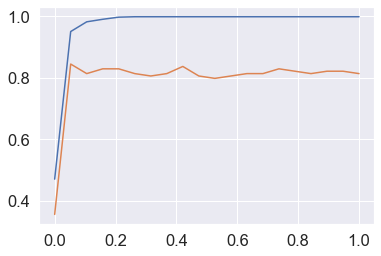

In [161]:
plt.plot(np.linspace(0,1,20),train_score);
plt.plot(np.linspace(0,1,20),test_score);

In [162]:
np.array(test_score)

array([0.35658915, 0.84496124, 0.81395349, 0.82945736, 0.82945736,
       0.81395349, 0.80620155, 0.81395349, 0.8372093 , 0.80620155,
       0.79844961, 0.80620155, 0.81395349, 0.81395349, 0.82945736,
       0.82170543, 0.81395349, 0.82170543, 0.82170543, 0.81395349])

In [163]:
np.linspace(0,1,20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [164]:
# XGBoost

train_score=[];
test_score=[];

for eta1 in np.linspace(0,0.1,20):
    model=XGBClassifier(eta=eta1).fit(X_train,y_train);
    train_score.append(model.score(X_train,y_train))
    test_score.append(model.score(X_test,y_test))

C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


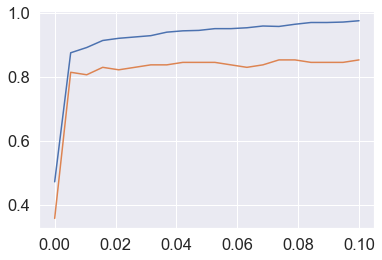

In [165]:
plt.plot(np.linspace(0,0.1,20),train_score);
plt.plot(np.linspace(0,0.1,20),test_score);

In [166]:
np.array(test_score)

array([0.35658915, 0.81395349, 0.80620155, 0.82945736, 0.82170543,
       0.82945736, 0.8372093 , 0.8372093 , 0.84496124, 0.84496124,
       0.84496124, 0.8372093 , 0.82945736, 0.8372093 , 0.85271318,
       0.85271318, 0.84496124, 0.84496124, 0.84496124, 0.85271318])

In [167]:
np.array(train_score)

array([0.47115385, 0.875     , 0.89148352, 0.91346154, 0.92032967,
       0.92445055, 0.92857143, 0.93956044, 0.94368132, 0.94505495,
       0.95054945, 0.95054945, 0.9532967 , 0.95879121, 0.95741758,
       0.96428571, 0.96978022, 0.96978022, 0.97115385, 0.97527473])

In [168]:
np.linspace(0,0.1,20)

array([0.        , 0.00526316, 0.01052632, 0.01578947, 0.02105263,
       0.02631579, 0.03157895, 0.03684211, 0.04210526, 0.04736842,
       0.05263158, 0.05789474, 0.06315789, 0.06842105, 0.07368421,
       0.07894737, 0.08421053, 0.08947368, 0.09473684, 0.1       ])

### On experimenting optimal eta is close to 0.05

### Now let us tune another parameter gamma

In [169]:
train_score=[];
test_score=[];
eta_opt=0.05; #0.04 - 0.08
for gamma1 in np.linspace(0,100,50):
    model=XGBClassifier(eta=eta_opt,gamma=gamma1).fit(X_train,y_train);
    train_score.append(model.score(X_train,y_train))
    test_score.append(model.score(X_test,y_test))

C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


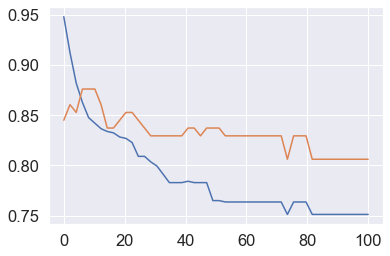

In [170]:
plt.plot(np.linspace(0,100,50),train_score);
plt.plot(np.linspace(0,100,50),test_score);

In [171]:
np.linspace(0,100,50)

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

In [172]:
test_score

[0.8449612403100775,
 0.8604651162790697,
 0.8527131782945736,
 0.875968992248062,
 0.875968992248062,
 0.875968992248062,
 0.8604651162790697,
 0.8372093023255814,
 0.8372093023255814,
 0.8449612403100775,
 0.8527131782945736,
 0.8527131782945736,
 0.8449612403100775,
 0.8372093023255814,
 0.8294573643410853,
 0.8294573643410853,
 0.8294573643410853,
 0.8294573643410853,
 0.8294573643410853,
 0.8294573643410853,
 0.8372093023255814,
 0.8372093023255814,
 0.8294573643410853,
 0.8372093023255814,
 0.8372093023255814,
 0.8372093023255814,
 0.8294573643410853,
 0.8294573643410853,
 0.8294573643410853,
 0.8294573643410853,
 0.8294573643410853,
 0.8294573643410853,
 0.8294573643410853,
 0.8294573643410853,
 0.8294573643410853,
 0.8294573643410853,
 0.8062015503875969,
 0.8294573643410853,
 0.8294573643410853,
 0.8294573643410853,
 0.8062015503875969,
 0.8062015503875969,
 0.8062015503875969,
 0.8062015503875969,
 0.8062015503875969,
 0.8062015503875969,
 0.8062015503875969,
 0.8062015503875

In [173]:
train_score

[0.9478021978021978,
 0.9120879120879121,
 0.8818681318681318,
 0.8626373626373627,
 0.8475274725274725,
 0.842032967032967,
 0.8365384615384616,
 0.8337912087912088,
 0.8324175824175825,
 0.8282967032967034,
 0.8269230769230769,
 0.8228021978021978,
 0.8090659340659341,
 0.8090659340659341,
 0.8035714285714286,
 0.7994505494505495,
 0.7912087912087912,
 0.782967032967033,
 0.782967032967033,
 0.782967032967033,
 0.7843406593406593,
 0.782967032967033,
 0.782967032967033,
 0.782967032967033,
 0.7651098901098901,
 0.7651098901098901,
 0.7637362637362637,
 0.7637362637362637,
 0.7637362637362637,
 0.7637362637362637,
 0.7637362637362637,
 0.7637362637362637,
 0.7637362637362637,
 0.7637362637362637,
 0.7637362637362637,
 0.7637362637362637,
 0.7513736263736264,
 0.7637362637362637,
 0.7637362637362637,
 0.7637362637362637,
 0.7513736263736264,
 0.7513736263736264,
 0.7513736263736264,
 0.7513736263736264,
 0.7513736263736264,
 0.7513736263736264,
 0.7513736263736264,
 0.7513736263736264,

In [174]:
train_score=[];
test_score=[];
eta_opt=0.05; #0.04 - 0.08
gamma_opt=5; # 4 - 6
for max_depth1 in np.linspace(2,10,9):
    model=XGBClassifier(eta=eta_opt,gamma=gamma_opt,max_depth=int(max_depth1)).fit(X_train,y_train);
    train_score.append(model.score(X_train,y_train))
    test_score.append(model.score(X_test,y_test))

C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nay

[00:33:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


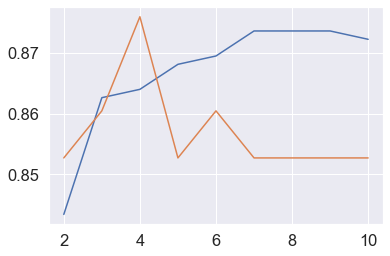

In [175]:
plt.plot(np.linspace(2,10,9),train_score);
plt.plot(np.linspace(2,10,9),test_score);

In [176]:
#train_score=[];
#test_score=[];
eta_opt=0.05; #0.04 - 0.08
gamma_opt=4; # 4 - 6
max_depth_opt=4; #4 
model=XGBClassifier(eta=eta_opt,gamma=gamma_opt,max_depth=max_depth_opt).fit(X_train,y_train);
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)

[00:33:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [177]:
train_score,test_score

(0.8722527472527473, 0.875968992248062)

In [178]:
train_score=[];
test_score=[];
eta_opt=0.05; #0.04 - 0.08
gamma_opt=4; # 4 - 6
max_depth_opt=4; #4 
for booster1 in ['gbtree','dart','gblinear']:
    model=XGBClassifier(eta=eta_opt,gamma=gamma_opt,max_depth=max_depth_opt,booster=booster1).fit(X_train,y_train);
    train_score.append(model.score(X_train,y_train))
    test_score.append(model.score(X_test,y_test))

C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:51] WARNING: ..\src\learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:33:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [179]:
['gbtree','dart','gblinear']

['gbtree', 'dart', 'gblinear']

In [180]:
np.array(train_score)

array([0.87225275, 0.87225275, 0.81181319])

In [181]:
np.array(test_score)

array([0.87596899, 0.87596899, 0.84496124])

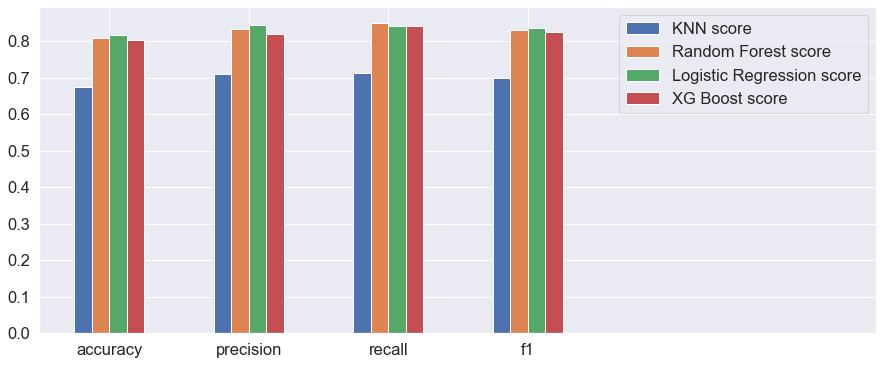

In [182]:
hypertuned_model_metrics=pd.DataFrame({'KNN score':cv_score_calc(KNeighborsClassifier(), X, y),
              'Random Forest score':cv_score_calc(RandomForestClassifier(n_estimators=200,min_samples_split=3,max_features='sqrt'), X, y),
              'Logistic Regression score':cv_score_calc(LogisticRegression(C=0.16237767391887217, penalty='l2',solver='liblinear'), X, y),
              'XG Boost score':cv_score_calc(XGBClassifier(eta=eta_opt,gamma=gamma_opt,max_depth=max_depth_opt), X, y)})
hypertuned_model_metrics.plot(kind='bar', figsize=(15,6));
plt.xticks(rotation=0)
l,r=plt.xlim();
plt.xlim(l,r+2);

In [183]:
hypertuned_model_metrics

,KNN score,Random Forest score,Logistic Regression score,XG Boost score
accuracy,0.674582,0.807521,0.816857,0.804026
precision,0.709105,0.832208,0.843277,0.818575
recall,0.712057,0.850629,0.841913,0.842164
f1,0.698158,0.831210,0.834739,0.823846


### Random Forest Classifier Cross Validation

In [184]:
RFC_cv5=cross_val_score(RandomForestClassifier(n_estimators=200,min_samples_split=5,max_features='sqrt'), X, y,cv=5,n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [185]:
print(f'Best case cross validation score for Random Forest Classifier is = {np.max(RFC_cv5)}')

Best case cross validation score for Random Forest Classifier is = 0.9181286549707602


### Logistic Regressor Cross Validation

In [186]:
LR_cv5=cross_val_score(LogisticRegression(C=0.16237767391887217, penalty='l2',solver='liblinear'), X, y,cv=5,n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [187]:
print(f'Best case cross validation score for Logistic Regressor is = {np.max(LR_cv5)}')

Best case cross validation score for Logistic Regressor is = 0.8888888888888888


### XGBoost Cross Validation

In [188]:
XGB_cv5=cross_val_score(XGBClassifier(eta=eta_opt,gamma=gamma_opt,max_depth=max_depth_opt), X, y,cv=5,n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [189]:
print(f'Best case cross validation score for XGBoost Classifier is = {np.max(XGB_cv5)}')

Best case cross validation score for XGBoost Classifier is = 0.9122807017543859


### Let's try experimenting and tuning further with Random Forest 

In [190]:
np.random.seed(42);
RFC_grid1={'max_samples':[728]}
GSCV_RFC=GridSearchCV( RandomForestClassifier(n_estimators=200,min_samples_split=8,max_features='auto',random_state=35) , RFC_grid1, cv=5,n_jobs=-1,verbose=2)
GSCV_RFC.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\nayar.raunaq\Jupiter_Notebooks\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(min_samples_split=8,
                                              n_estimators=200,
                                              random_state=35),
             n_jobs=-1, param_grid={'max_samples': [728]}, verbose=2)

In [191]:
GSCV_RFC.best_params_

{'max_samples': 728}

In [192]:
GSCV_RFC.score(X_train,y_train)

0.929945054945055

In [193]:
GSCV_RFC.score(X_test,y_test)

0.8837209302325582

In [194]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Need to obtain more data for higher accuracy ...

import more heart disease records from Kaggle link - https://www.kaggle.com/johnsmith88/heart-disease-dataset?select=heart.csv

In [195]:
heart_disease_larger_data=pd.read_csv('heart_disease_large_database.csv');
heart_disease_larger_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [196]:
heart_disease_larger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Data is already arranged in numerical form with no null values ... Looks like no preprocessing needed

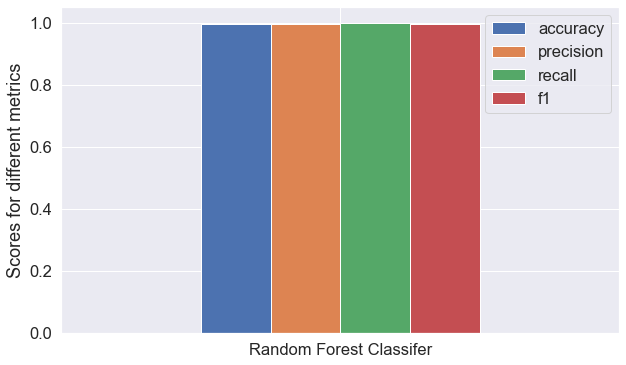

In [197]:
X = heart_disease_larger_data.drop('target',axis=1);
y = heart_disease_larger_data['target'];

pd.DataFrame(cv_score_calc(RandomForestClassifier(),X,y),index=['Random Forest Classifer']).plot.bar(figsize=(10,6))
plt.xticks(rotation=0)
plt.ylabel('Scores for different metrics');


### Seems like data is sufficient and even tuning is not required

### Training perfect model

In [198]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2);
rfc_model=RandomForestClassifier();
rfc_model.fit(X_train,y_train);

### Feature importance calculation

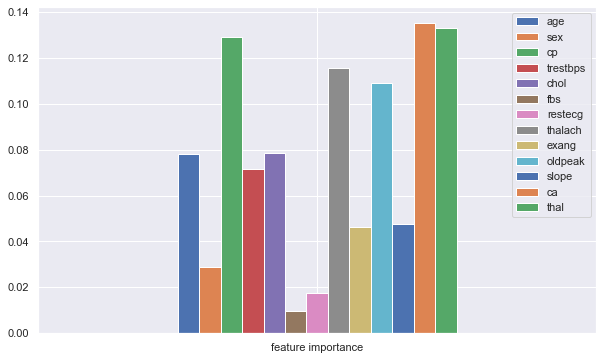

In [199]:
sns.set_theme()
pd.DataFrame([rfc_model.feature_importances_],columns=X.columns,index=['feature importance']).plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=0);

### Compare Feature importance with cross correlation

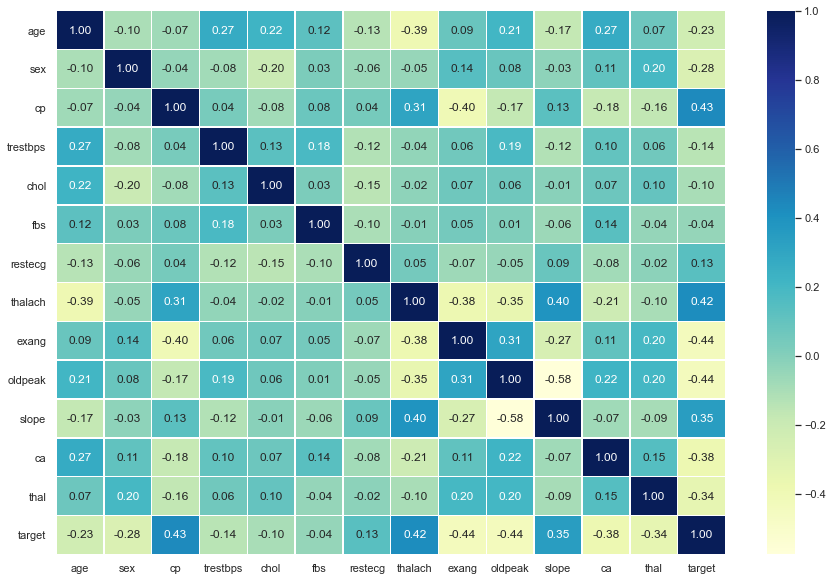

In [200]:
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(heart_disease_larger_data.corr() , annot=True, linewidths=0.5,fmt='.2f',cmap='YlGnBu')

### Prediction for test data

In [201]:
y_preds=rfc_model.predict(X_test);

### Score evaluation for test 

In [202]:
print(f'Training Data Accuracy Score = {rfc_model.score(X_train , y_train):.4f}')
print(f'Testing Data Accuracy Score = {rfc_model.score(X_test , y_test):.4f}')
print(f'Overall Data Accuracy Score = {rfc_model.score(X , y):.4f}')

Training Data Accuracy Score = 1.0000
Testing Data Accuracy Score = 0.9854
Overall Data Accuracy Score = 0.9971


In [203]:
print(f'Accuracy Score = {accuracy_score(y_test,y_preds)}')
print(f'Precision Score = {precision_score(y_test,y_preds)}')
print(f'Recall Score = {recall_score(y_test,y_preds)}')
print(f'F1 Score = {f1_score(y_test,y_preds)}')

Accuracy Score = 0.9853658536585366
Precision Score = 1.0
Recall Score = 0.970873786407767
F1 Score = 0.9852216748768473


### Print Classfication Report

In [204]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Display Confusion Matrix

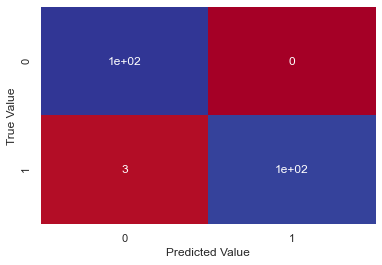

In [205]:
sns.heatmap(confusion_matrix(y_test,y_preds), cmap='RdYlBu',annot=True, cbar=False);
plt.xlabel('Predicted Value');
plt.ylabel('True Value');


### Cross-validation Scoring

In [206]:
scoring=dict();
metrics=['accuracy','precision','recall','f1']
for it in metrics:
    scoring[it]=[np.mean(cross_val_score(RandomForestClassifier(),X,y,cv=5,scoring=it,n_jobs=-1))];


In [207]:
pd.DataFrame(scoring,index=['Random Forest Cross validation Scores'])

,accuracy,precision,recall,f1
Random Forest Cross validation Scores,0.997073,0.994495,1.0,0.997209


### AUC-ROC curve

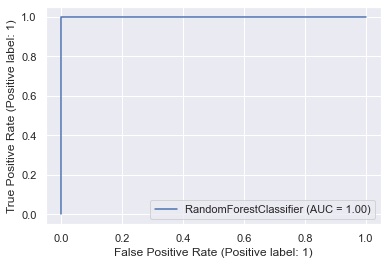

In [208]:
plot_roc_curve(rfc_model,X,y);

## This ends our project as we have implemented model with 99% accuracy (better than the decides 95% accuracy)

# Before leaving let us save our model

In [209]:
import pickle as pkl;

In [210]:
pkl.dump(rfc_model,open('heart_disease_classification_model.pkl','wb'))

# Check if model can be loaded

In [211]:
clf_model=pkl.load(open('heart_disease_classification_model.pkl','rb'))

In [212]:
print(classification_report(y_test,clf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# Model can now be loaded and used

# * ** ** ** ** ** ** ** ** ** ** ** ** ** ** **<i><b>THE END </b></i>** ** ** ** ** ** ** ** ** ** ** ** ** ** ** *